#Xavier Initilize Only for tanh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


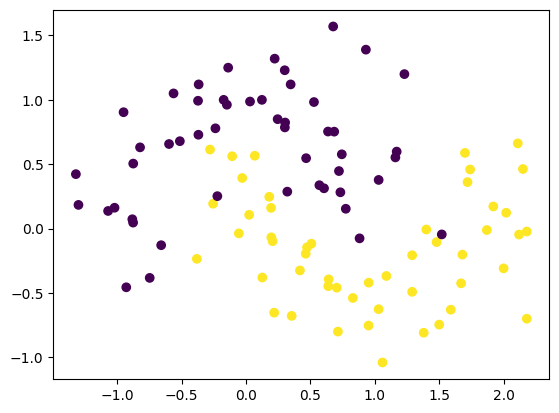

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 0.04959923, -0.46606204, -0.60606474,  0.3432669 ,  0.21852684,
          0.64193684, -0.2514616 ,  0.36069793, -0.6174867 , -0.21447688],
        [ 0.6763074 ,  0.0026868 , -0.44994408,  0.19890326,  0.04653651,
         -0.63810325,  0.01635092,  0.18356472, -0.64896774, -0.26002228]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.53223157,  0.306944  ,  0.29071146,  0.517522  ,  0.2678786 ,
         -0.36598536,  0.12560469,  0.3856321 , -0.09954286,  0.52486265],
        [ 0.45235336,  0.40898943, -0.20887274,  0.1954751 ,  0.4520182 ,
         -0.46157718,  0.5046917 , -0.412605  ,  0.03194332, -0.5235151 ],
        [ 0.03652304, -0.44438106,  0.13687164, -0.25950623, -0.5174308 ,
          0.24337465,  0.19723648, -0.49286744, -0.08072656, -0.39456266],
        [-0.085356  ,  0.45675206, -0.2987848 ,  0.2643143 , -0.04346257,
          0.20178223, -0.20674795, -0.2622116 ,  0.4761052 , -0.42448807],
        [-0.37428

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.5622489 ,  0.7911945 ,  0.6074678 ,  0.5543499 , -0.4274825 ,
          0.24518283,  0.20372215, -0.65368146,  0.85670376,  0.33160928],
        [ 1.154002  , -0.8306876 , -0.62038976, -0.89474326,  0.34611195,
         -0.07919197, -0.9525355 , -0.3518059 , -1.099529  ,  0.5407947 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.24767594, -0.05063265,  0.04208002, -0.00147693,  0.3397351 ,
         -0.17264386, -0.5516638 ,  0.48024842, -0.35153767, -0.20854592],
        [ 0.21530466,  0.3024928 ,  0.1357973 , -0.1518853 ,  0.45842004,
          0.3418243 ,  0.06526104, -0.1963098 , -0.4712307 ,  0.13129838],
        [-0.08213442, -0.5212489 ,  0.22679278, -0.32342827,  0.04997711,
         -0.09911047,  0.10966501, -0.10016403, -0.22269534,  0.2690356 ],
        [ 0.454561  ,  0.1450996 , -0.06664482, -0.22607315,  0.09599231,
         -0.26323444,  0.1924418 ,  0.2736479 ,  0.22034648,  0.27355355],
        [-0.58659

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 119ms/step - loss: 0.6047 - accuracy: 0.7750 - val_loss: 0.5657 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5905 - accuracy: 0.7875 - val_loss: 0.5492 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.5784 - accuracy: 0.7875 - val_loss: 0.5332 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5657 - accuracy: 0.7875 - val_loss: 0.5179 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5528 - accuracy: 0.8125 - val_loss: 0.5033 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5415 - accuracy: 0.8125 - val_loss: 0.4889 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.5303 - accuracy: 0.8125 - val_loss: 0.4750 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

In [15]:
model.get_weights()

[array([[-0.5330344 ,  0.63483196,  0.6463505 ,  0.48182005, -0.35898817,
          0.10193761,  0.18530205, -0.7780144 ,  0.7247017 ,  0.31664887],
        [ 1.2234424 , -0.95351094, -0.54897875, -0.98397744,  0.43849173,
         -0.15083584, -0.9023567 , -0.43050602, -1.2038225 ,  0.4960392 ]],
       dtype=float32),
 array([ 0.03035475, -0.06188611,  0.02944045, -0.04980358,  0.04217104,
        -0.08317491, -0.01531407,  0.12470371, -0.04410161, -0.07558504],
       dtype=float32),
 array([[ 2.58394003e-01, -1.11840539e-01, -2.70664580e-02,
          5.36168255e-02,  2.61948168e-01, -2.45157063e-01,
         -6.25082135e-01,  4.20112431e-01, -4.15328294e-01,
         -2.61113733e-01],
        [ 1.57565489e-01,  3.44490975e-01,  1.64375037e-01,
         -1.88370064e-01,  4.97145832e-01,  3.89605045e-01,
          1.17714122e-01, -1.54027894e-01, -4.25650507e-01,
          1.39606431e-01],
        [-1.74574032e-01, -4.87054378e-01,  2.30523810e-01,
         -3.59548837e-01,  7.01830

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

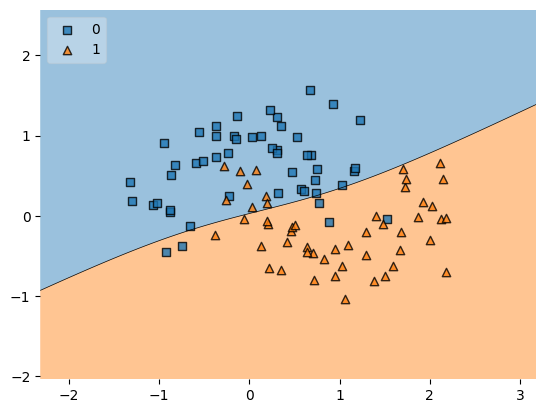

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

#He_Normal
##default - Glorat_uniform

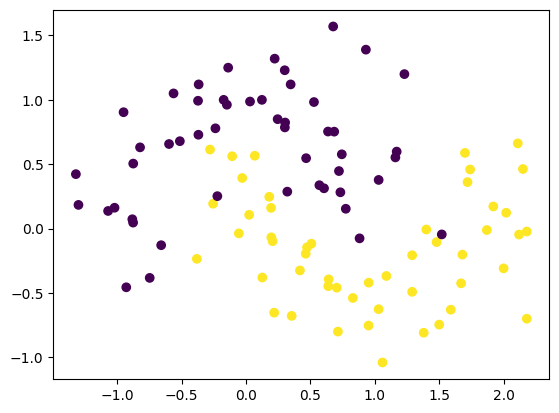

In [17]:
df = pd.read_csv('/content/ushape.csv')

plt.scatter(df['X'],df['Y'],c=df['class'])

X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [18]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 96ms/step - loss: 0.6810 - accuracy: 0.5250 - val_loss: 0.6667 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6762 - accuracy: 0.5375 - val_loss: 0.6608 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6721 - accuracy: 0.5875 - val_loss: 0.6545 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6680 - accuracy: 0.6625 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6638 - accuracy: 0.6750 - val_loss: 0.6412 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6597 - accuracy: 0.7000 - val_loss: 0.6345 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6557 - accuracy: 0.7000 - val_loss: 0.6277 - val_accuracy: 0.7500
Epoch 8/100
3/3 [===

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

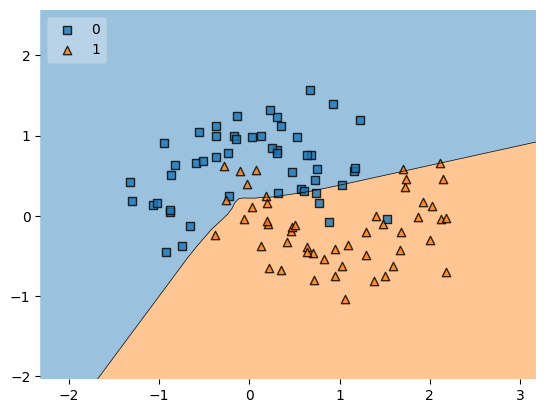

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

#He_uniform

In [34]:
df = pd.read_csv('/content/ushape.csv')

X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                30        
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)


In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 161ms/step - loss: 0.6801 - accuracy: 0.5125 - val_loss: 0.6585 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6754 - accuracy: 0.5500 - val_loss: 0.6537 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6716 - accuracy: 0.5500 - val_loss: 0.6501 - val_accuracy: 0.6500
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6684 - accuracy: 0.5500 - val_loss: 0.6473 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6657 - accuracy: 0.6000 - val_loss: 0.6444 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6633 - accuracy: 0.6125 - val_loss: 0.6419 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6606 - accuracy: 0.6250 - val_loss: 0.6394 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

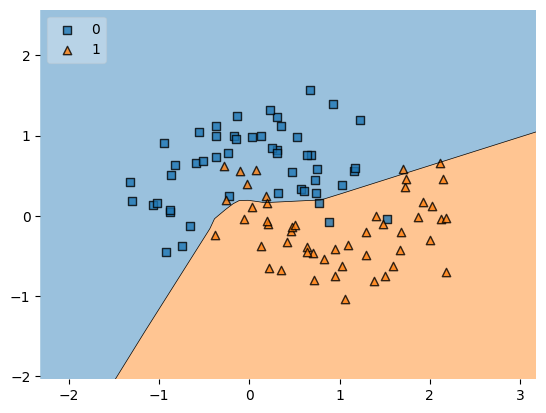

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)